# Imports

In [981]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import re

In [982]:
from typing import List, Union

In [983]:
plt.style.use('dark_background')

# Load Train Data

In [984]:
train_data_raw= pd.read_csv(r"C:\Users\User\Desktop\Projects\Kaggle\Kaggle_Tasks\Mental_Health\data\train.csv",
                        index_col='id')

In [985]:
train_data_raw.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,,
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [986]:
train_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140700 entries, 0 to 140699
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Name                                   140700 non-null  object 
 1   Gender                                 140700 non-null  object 
 2   Age                                    140700 non-null  float64
 3   City                                   140700 non-null  object 
 4   Working Professional or Student        140700 non-null  object 
 5   Profession                             104070 non-null  object 
 6   Academic Pressure                      27897 non-null   float64
 7   Work Pressure                          112782 non-null  float64
 8   CGPA                                   27898 non-null   float64
 9   Study Satisfaction                     27897 non-null   float64
 10  Job Satisfaction                       112790 non-null  float

In [987]:
train_data_raw.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


## Data Columns by `dtype`

In [988]:
TARGET = 'Depression'

In [989]:
YES_NO_COLS = ['Family History of Mental Illness', 'Have you ever had suicidal thoughts ?']

In [990]:
CAT_COLS = train_data_raw.select_dtypes(object).columns.tolist()
CAT_COLS = [col for col in CAT_COLS if col not in YES_NO_COLS]
print(CAT_COLS)

['Name', 'Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree']


In [991]:
NUM_COLS = train_data_raw.select_dtypes([np.number]).columns.tolist()
NUM_COLS.remove(TARGET)
print(NUM_COLS)

['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']


In [992]:
len(train_data_raw.columns) == (len(NUM_COLS) + len(CAT_COLS) + len(YES_NO_COLS) + 1)

True

# Raw Exploration

In [993]:
def annot_plot(ax):
    for i in ax.containers:
        ax.bar_label(i)

## Correlation Heatmap

In [994]:
# train_data_raw.corr()

In [995]:
# plt.figure(figsize=(7,7))
# sns.heatmap(train_data_raw[YES_NO_COLS + NUM_COLS + [TARGET]].corr().abs(), cmap='vlag', annot=True)
# plt.xticks(rotation=45, ha='right')
# plt.show()

## Depressed Population Exploration (Raw Training Data)

In [996]:
dprsd_df = train_data_raw.loc[train_data_raw[TARGET] == 1]
dprsd_df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,,
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
15,Aditi,Female,23.0,Patna,Working Professional,Marketing Manager,NaN,2.0,NaN,NaN,2.0,5-6 hours,Healthy,MA,Yes,6.0,4.0,Yes,1
27,Aarav,Male,50.0,Ghaziabad,Working Professional,HR Manager,NaN,5.0,NaN,NaN,3.0,Less than 5 hours,Healthy,MA,Yes,12.0,5.0,Yes,1


### Professional or Student 

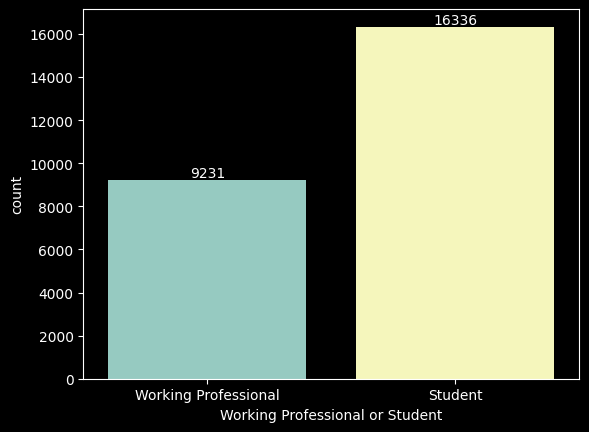

In [997]:
ax = sns.countplot(dprsd_df, x='Working Professional or Student', hue='Working Professional or Student', legend=False)
annot_plot(ax)

### Work Pressure

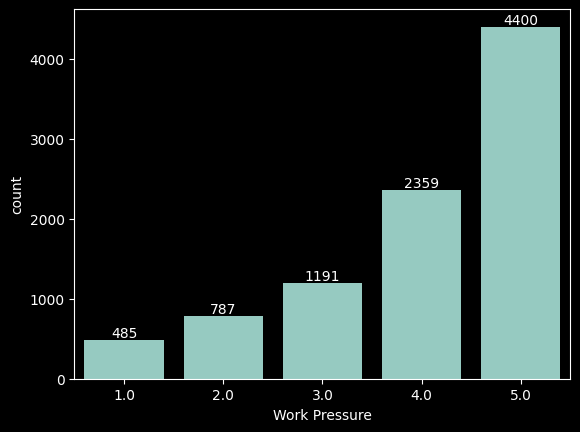

In [998]:
ax = sns.countplot(dprsd_df, x='Work Pressure')
annot_plot(ax)

### Job Satisfaction

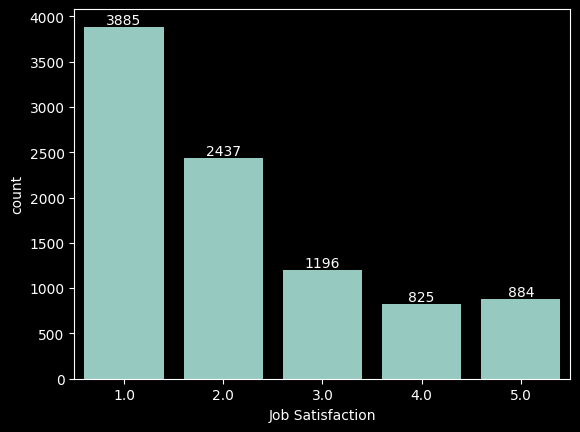

In [999]:
ax = sns.countplot(dprsd_df, x='Job Satisfaction')
annot_plot(ax)

### Work/Study Hours

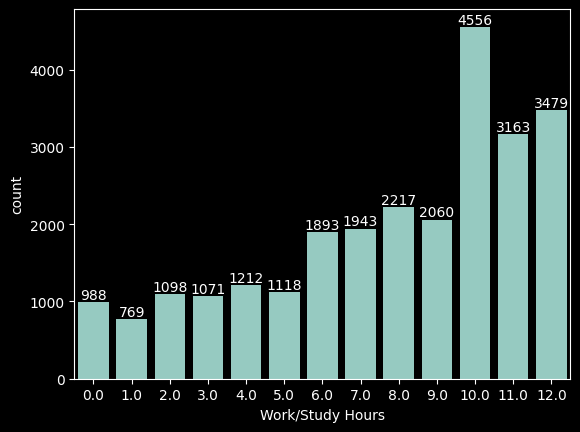

In [1000]:
ax = sns.countplot(dprsd_df, x='Work/Study Hours')
annot_plot(ax)

### Financial Stress

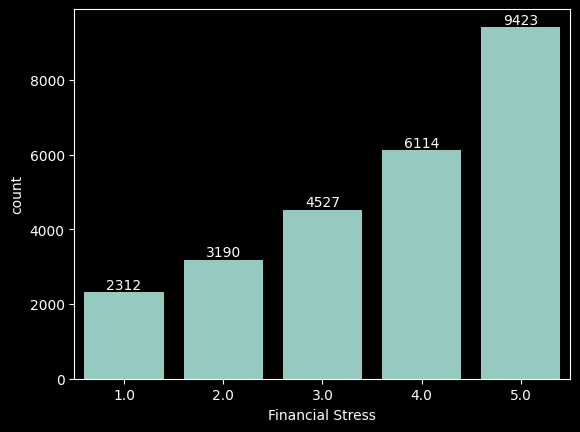

In [1001]:
ax = sns.countplot(dprsd_df, x='Financial Stress')
annot_plot(ax)

### Family History of Mental Illness

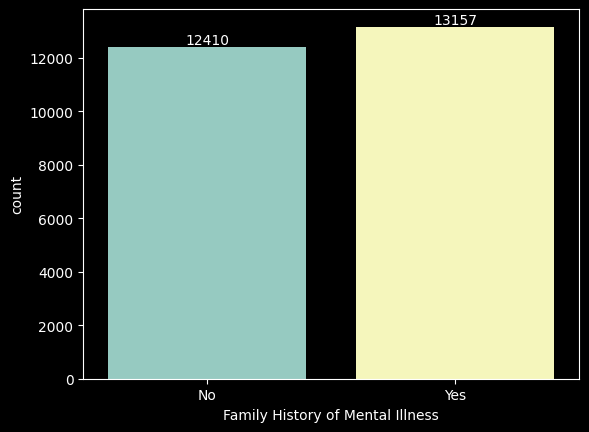

In [1002]:
ax = sns.countplot(dprsd_df, x='Family History of Mental Illness', hue='Family History of Mental Illness', legend=False)
annot_plot(ax)

### Have you ever had suicidal thoughts ?

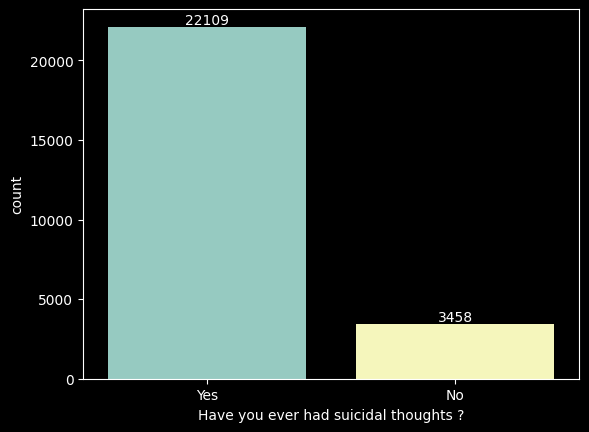

In [1003]:
ax = sns.countplot(dprsd_df, x='Have you ever had suicidal thoughts ?',  hue='Have you ever had suicidal thoughts ?', legend=False)
annot_plot(ax)

### Age

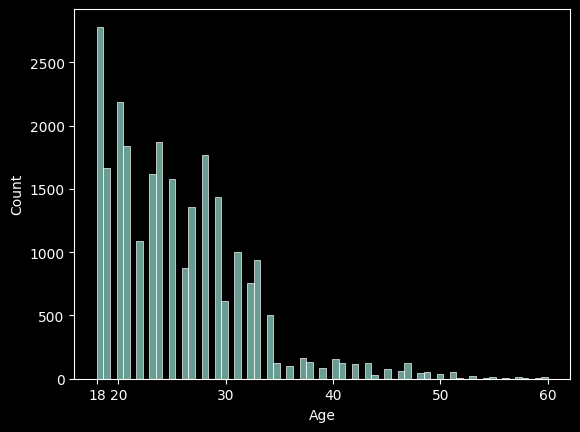

In [1004]:
sns.histplot(dprsd_df, x='Age')
plt.xticks([dprsd_df['Age'].min(), 20, 30, 40, 50, dprsd_df['Age'].max()])
plt.show()

### Profession

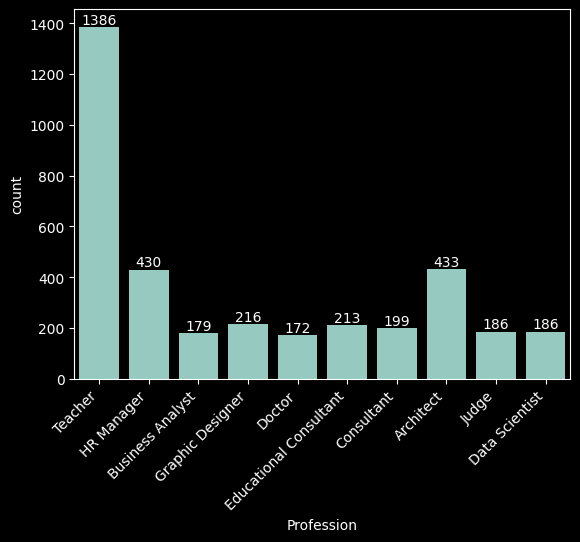

In [1005]:
ax = sns.countplot(dprsd_df.loc[dprsd_df["Profession"].isin(dprsd_df['Profession'].value_counts().iloc[:10].index.tolist()), [TARGET, 'Profession' ]], x='Profession')
plt.xticks(rotation=45, ha='right')
annot_plot(ax)

### Dietary Habits

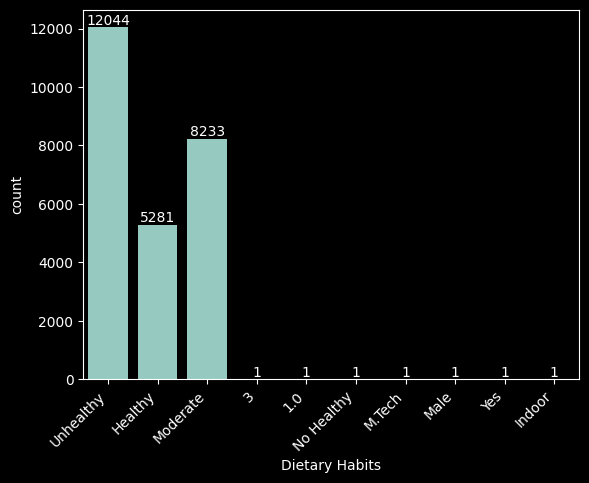

In [1006]:
ax = sns.countplot(dprsd_df.loc[dprsd_df["Dietary Habits"].isin(dprsd_df['Dietary Habits'].value_counts().iloc[:10].index.tolist()), [TARGET, 'Dietary Habits' ]], x='Dietary Habits')
plt.xticks(rotation=45, ha='right')
annot_plot(ax)

### Sleep Duration


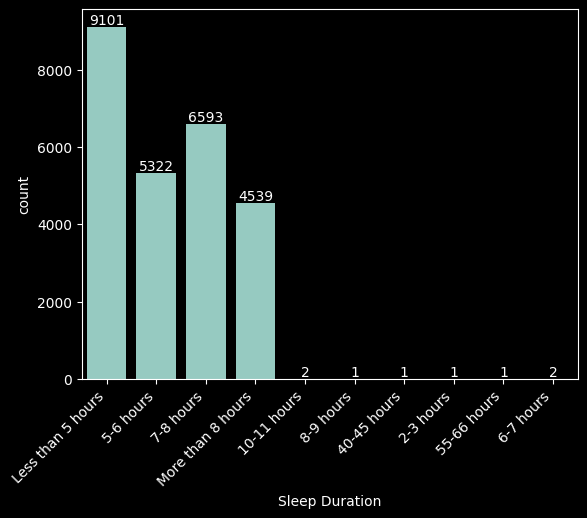

In [1007]:
ax = sns.countplot(dprsd_df.loc[dprsd_df["Sleep Duration"].isin(dprsd_df['Sleep Duration'].value_counts().iloc[:10].index.tolist()), [TARGET, 'Sleep Duration' ]], x='Sleep Duration')
plt.xticks(rotation=45, ha='right')
annot_plot(ax)

### Degree

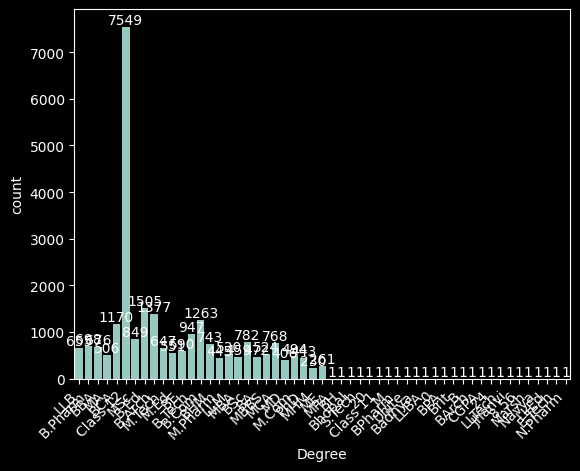

In [1091]:
ax = sns.countplot(dprsd_df.loc[dprsd_df["Degree"].isin(dprsd_df['Degree'].value_counts().index.tolist()), [TARGET, 'Degree' ]], x='Degree')
plt.xticks(rotation=45, ha='right')
annot_plot(ax)

In [1106]:
train_data = train_data_raw.copy()

# Nulls

## Drop Columns w/ Nulls Over Threshold

In [1107]:
def drop_over_thrsld_nulls_cols(data: pd.DataFrame, nulls_threshold: float = 0.45):
    nulls_proportion = data.isnull().sum() / len(data)
    nulls_more_thrsld = nulls_proportion[nulls_proportion.ge(nulls_threshold)].index.tolist()
    nulls_less_thrsld = nulls_proportion[nulls_proportion.lt(nulls_threshold)].index.tolist()
    print(f"By the threshold: {nulls_threshold}\nDropped the next columns:\n{nulls_proportion[nulls_more_thrsld]}")
    data.drop(nulls_more_thrsld, axis=1, inplace=True)

    return nulls_more_thrsld

In [1108]:
dropped_columns_list = drop_over_thrsld_nulls_cols(train_data)
dropped_columns_list

By the threshold: 0.45
Dropped the next columns:
Academic Pressure     0.801727
CGPA                  0.801720
Study Satisfaction    0.801727
dtype: float64


['Academic Pressure', 'CGPA', 'Study Satisfaction']

In [1110]:
NUM_COLS    = [col for col in NUM_COLS    if col not in dropped_columns_list]
CAT_COLS    = [col for col in CAT_COLS    if col not in dropped_columns_list]
YES_NO_COLS = [col for col in YES_NO_COLS if col not in dropped_columns_list]

print(YES_NO_COLS, NUM_COLS, CAT_COLS, sep='\n')

['Family History of Mental Illness', 'Have you ever had suicidal thoughts ?']
['Age', 'Work Pressure', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']
['Name', 'Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree']


## Handle Nulls

In [1011]:
cols_w_nulls = train_data.columns[train_data.isnull().any()].tolist()
print(cols_w_nulls)

['Profession', 'Work Pressure', 'Job Satisfaction', 'Dietary Habits', 'Degree', 'Financial Stress']


In [1012]:
with_nulls = train_data[cols_w_nulls].isnull().sum() / len(train_data[cols_w_nulls])
with_nulls._name = "proportion_of_nulls"
with_nulls

Profession          0.260341
Work Pressure       0.198422
Job Satisfaction    0.198365
Dietary Habits      0.000028
Degree              0.000014
Financial Stress    0.000028
Name: proportion_of_nulls, dtype: float64

In [1013]:
def fill_na_by(data: pd.DataFrame, columns: List[str], method: str) -> pd.DataFrame:
    if method == 'mode':
        method_func = lambda x: x.mode()[0]
    elif method == 'mean':
        method_func = lambda x: round(x.mean())
    else:
        raise ValueError("wrong method")

    for col in columns:
        value = method_func(data[col])
        data[col] = data[col].fillna(value)
        
    return data

### Categorical Features

In [1014]:
temp_cat_nulls_df = pd.merge(train_data[with_nulls.index.tolist()].describe(include=['O']).T, with_nulls, left_index=True, right_index=True)
temp_cat_nulls_df

,count,unique,top,freq,proportion_of_nulls
Profession,104070,64,Teacher,24906,0.260341
Dietary Habits,140696,23,Moderate,49705,0.000028
Degree,140698,115,Class 12,14729,0.000014


In [1015]:
train_data = fill_na_by(train_data, ["Dietary Habits", "Degree"], method='mode')

#### Profession`.fillna("Unknown")`

In [1016]:
train_data['Profession'] = train_data['Profession'].fillna("Unknown")

##### Profession `Student` to `Uknown`

In [1077]:
train_data['Profession'] = train_data['Profession'].replace({'Student': 'Unknown'})

### Numerical Features

In [1017]:
temp_num_nulls_df = pd.merge(train_data[with_nulls.index.tolist()].describe().T, with_nulls, left_index=True, right_index=True)
temp_num_nulls_df

,count,mean,std,min,25%,50%,75%,max,proportion_of_nulls
Work Pressure,112782.0,2.998998,1.405771,1.0,2.0,3.0,4.0,5.0,0.198422
Job Satisfaction,112790.0,2.974404,1.416078,1.0,2.0,3.0,4.0,5.0,0.198365
Financial Stress,140696.0,2.988983,1.413633,1.0,2.0,3.0,4.0,5.0,0.000028


#### Financial Stress

In [1018]:
train_data = fill_na_by(train_data, ['Financial Stress'], method='mode')

In [1019]:
train_data.isnull().sum()

Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Work Pressure                            27918
Job Satisfaction                         27910
Sleep Duration                               0
Dietary Habits                               0
Degree                                       0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
Depression                                   0
dtype: int64

#### Work Satisfaction & Pressure

In [1020]:
train_data[['Work Pressure', 'Job Satisfaction']].isna().sum(axis=1).value_counts()

0    112777
2     27905
1        18
Name: count, dtype: int64

<Axes: xlabel='Work Pressure', ylabel='Job Satisfaction'>

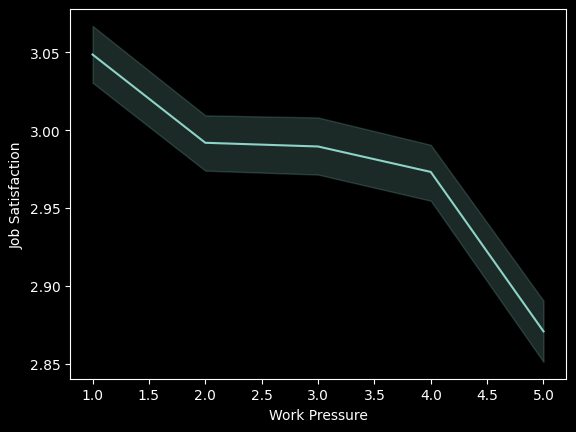

In [1021]:
sns.lineplot(train_data, x='Work Pressure', y='Job Satisfaction')

##### KNN Imputing

In [1022]:
from sklearn.impute import KNNImputer

In [ ]:
job_ordinal_features_df = train_data[['Work Pressure', 'Job Satisfaction', 'Financial Stress']]
job_ordinal_features_df.head()

,Work Pressure,Job Satisfaction,Financial Stress
id,,,
0,5.0,2.0,2.0
1,4.0,3.0,3.0
2,NaN,NaN,1.0
3,5.0,1.0,1.0
4,1.0,1.0,4.0
...,...,...,...
140695,5.0,4.0,4.0
140696,5.0,4.0,5.0
140697,3.0,1.0,4.0


In [ ]:
import pickle

In [ ]:
# imputer = KNNImputer(n_neighbors=2)
# imputed_matrix = imputer.fit_transform(job_ordinal_features_df.values)
# pickle.dump(imputer, open(r"C:\Users\User\Desktop\Projects\Kaggle\Kaggle_Tasks\Mental_Health\Models\knn_imputer_nn2.pkl", "wb"))
# pickle.dump(imputer, open(r"C:\Users\User\Desktop\Projects\Kaggle\Kaggle_Tasks\Mental_Health\Models\knn_imputer_nn2.pkl", "wb"))

In [ ]:
imputer = pickle.load(open(r"C:\Users\User\Desktop\Projects\Kaggle\Kaggle_Tasks\Mental_Health\Models\knn_imputer_nn2.pkl", 'rb'))
imputed_matrix = imputer.transform(job_ordinal_features_df.values)

In [ ]:
imputed_df = pd.DataFrame(imputed_matrix, columns=job_ordinal_features_df.columns, index=job_ordinal_features_df.index)
imputed_df.head()

In [ ]:
train_data[['Work Pressure', 'Job Satisfaction', 'Financial Stress']] = imputed_df
train_data[['Work Pressure', 'Job Satisfaction', 'Financial Stress']].head()

,Work Pressure,Job Satisfaction,Financial Stress
id,,,
0,5.0,2.0,2.0
1,4.0,3.0,3.0
2,2.0,3.5,1.0
3,5.0,1.0,1.0
4,1.0,1.0,4.0
...,...,...,...
140695,5.0,4.0,4.0
140696,5.0,4.0,5.0
140697,3.0,1.0,4.0


In [1089]:
train_data

,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,Unknown,2.0,3.5,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,Vidya,Female,18.0,Ahmedabad,Working Professional,Unknown,5.0,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,5.0,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,3.0,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0


In [ ]:
# train_data_raw.loc[(train_data_raw['Working Professional or Student'] == 'Student') & (train_data_raw['Profession'].notnull()), ['Working Professional or Student', 'Profession']]

,Working Professional or Student,Profession
id,,
609,Student,Civil Engineer
2105,Student,Architect
9483,Student,UX/UI Designer
11470,Student,Digital Marketer
12425,Student,Content Writer
16196,Student,Architect
16959,Student,Architect
18291,Student,Educational Consultant
19226,Student,Teacher


# Preprocess

In [1029]:
def preprocess(data: pd.DataFrame, 
               yes_no_cols: List,
               ):
    processed_data = data.copy()
    processed_data = change_yes_no_to_bin(data=processed_data, columns_list=yes_no_cols)
    replace_values_with_(processed_data, col='Dietary Habits', values_to_keep=['Unhealthy', 'Healthy', 'Moderate'], replace_with='Unknown')
    # map_rare2common_sleeping_hours(processed_data)
    return processed_data

def change_yes_no_to_bin(data: pd.DataFrame, columns_list: List ):
    for col in columns_list:
        data[col] =  np.where(data[col] == 'Yes', 1, 0)

    return data

def replace_values_with_(data: pd.DataFrame, col: str, values_to_keep: List, replace_with ):
    data.loc[~data[col].isin(values_to_keep), col] = replace_with

In [1030]:
processed_data = preprocess(data=train_data,
                            yes_no_cols=YES_NO_COLS,
                            )

processed_data.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,0,1.0,2.0,0,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,1,7.0,3.0,0,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,Unknown,NaN,NaN,5-6 hours,Healthy,B.Pharm,1,3.0,1.0,0,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,1,10.0,1.0,1,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,1,9.0,4.0,1,0


## Sleep Duration Values Standartization

In [1031]:
processed_data['Sleep Duration'].value_counts()[:6]

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
Name: count, dtype: int64

In [1032]:
sleeping_hours = ["Less than 5 hours", "7-8 hours", "5-6 hours", "More than 8 hours"]

In [1033]:
def extract_hours_regex(string: str) -> str:
    reg_result = re.findall(string=string, pattern=r"(\d\d?[\-\.\_]?\d?\d?)\s?hours?")
    if len(reg_result) == 0:
        return np.nan
    else:
        return reg_result[0]

def extract_more_less_regex(string: str) -> str:
    txt = re.findall(string=string, pattern=r"\b(less|Less|more|More|LESS|MORE)\b")
    if len(txt) == 1 :
        return txt[0]
    elif len(txt) == 0:
        return ''
    else:
        print("Attention! Founded more than 1 regex!")
        return txt

In [1034]:
def match_hour_to_category(hours: pd.DataFrame, sleeping_hours_str=List[str]) -> str:
    # print(hours['Sleep Duration'])
    if hours['Sleep Duration'] in sleeping_hours_str:
        return hours['Sleep Duration']
    if np.isnan(hours['splitted_hour_2']):
        if hours['splitted_hour_1'] > 8:
            return 'More than 8 hours'
        elif 7 <= hours['splitted_hour_1'] <= 8:
            return '7-8 hours'
        elif 5 <= hours['splitted_hour_1'] < 7:
            return '5-6 hours'
        elif hours['splitted_hour_1'] < 5:
            return 'Less than 5 hours'
        else:
            return None

    if hours['splitted_hour_1'] <= 5 and hours['splitted_hour_2'] <= 5:
        return 'Less than 5 hours'
    elif hours['splitted_hour_1'] >= 8 and hours['splitted_hour_2'] >= 8:
        return 'More than 8 hours'
    elif hours['splitted_hour_1'] >= 7 and hours['splitted_hour_2'] < 8:
        return '7-8 hours'
    elif hours['splitted_hour_1'] >= 6 and hours['splitted_hour_2'] <= 8:
        return '7-8 hours'
    elif hours['splitted_hour_1'] >= 5 and hours['splitted_hour_2'] <= 7:
        return '5-6 hours'
    elif hours['splitted_hour_1'] <= 5 and hours['splitted_hour_2'] <= 7:
        return '5-6 hours'
    else:
        return hours['Sleep Duration']

In [1035]:
def match_sleep_hours_strings(data: Union[pd.Series, pd.DataFrame], sleeping_hours_str: List[str]) -> pd.DataFrame:

    if type(data) is pd.Series:
        hours_list = data.copy()
        hours_list = hours_list.to_frame()
        hours_list.columns = ['Sleep Duration']
        
    hours_list = data.copy()
    hours_list['hours_regex']     = hours_list['Sleep Duration'].apply(lambda x: extract_hours_regex(x))
    print('~')
    hours_list['more_less_regex'] = hours_list['Sleep Duration'].apply(extract_more_less_regex)
    hours_list[['splitted_hour_1', 'splitted_hour_2']] = hours_list['hours_regex'].str.split('-', expand=True)
    hours_list['splitted_hour_1'] = hours_list['splitted_hour_1'].astype(float)
    hours_list['splitted_hour_2'] = hours_list['splitted_hour_2'].astype(float)
    hours_list['revised_sleep_duartion'] = hours_list[['splitted_hour_1', 'splitted_hour_2', 'Sleep Duration']].apply(match_hour_to_category, sleeping_hours_str=sleeping_hours_str ,axis=1)


    return hours_list['revised_sleep_duartion']

In [1036]:
processed_data['Sleep Duration'] = match_sleep_hours_strings(processed_data, sleeping_hours_str=sleeping_hours)
processed_data['Sleep Duration'].value_counts()

~


Sleep Duration
Less than 5 hours    38810
7-8 hours            36985
More than 8 hours    32737
5-6 hours            32153
Name: count, dtype: int64

## Rare Occurenced Values to `Rare {}`

In [ ]:
def replace_rare_occurenced(data: pd.Series, replace_with: str, threshold: int = 10, ) -> pd.Series:
    counts = data.value_counts()
    professions_mapping = {}
    for i, val in counts.items():
        if val < threshold:
            professions_mapping.update({i:replace_with})
        else:
            continue

    return data.replace(professions_mapping)

#### Profession

Jusification for replacing professions with low occurences with a single value `Rare Profession` is by the next graph.

We can see the distribution of professions available in training data.

<Axes: xlabel='count', ylabel='Profession'>

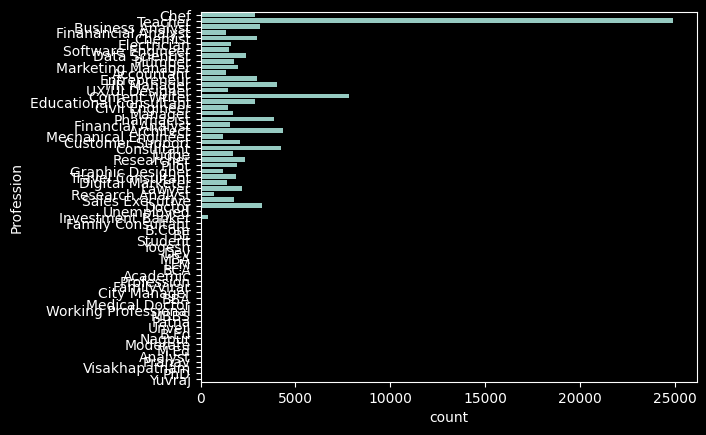

In [1037]:
sns.countplot(train_data_raw.loc[:,"Profession"])

In [ ]:
# def replace_rare_professions(data: pd.Series, threshold: int = 10) -> pd.Series:
#     counts = data.value_counts()
#     professions_mapping = {}
#     for i, val in counts.items():
#         if val < threshold:
#             professions_mapping.update({i:"Rare Profession"})
#         else:
#             continue

#     return data.replace(professions_mapping)

In [ ]:
processed_data['Profession'] = replace_rare_occurenced(data=processed_data['Profession'], replace_with='Rare Profession')

#### Degree

In [ ]:
processed_data['Degree'] = replace_rare_occurenced(data=processed_data['Degree'], replace_with='Rare Degree')

# Exploration

## Corr Heatmap

In [ ]:
# plt.figure(figsize=(7,7))
# sns.heatmap(processed_data[YES_NO_COLS + NUM_COLS + [TARGET]].corr().abs(), cmap='vlag', annot=True)
# plt.xticks(rotation=45, ha='right')
# plt.show()

KeyError: "['Academic Pressure', 'CGPA', 'Study Satisfaction'] not in index"

<Figure size 700x700 with 0 Axes>

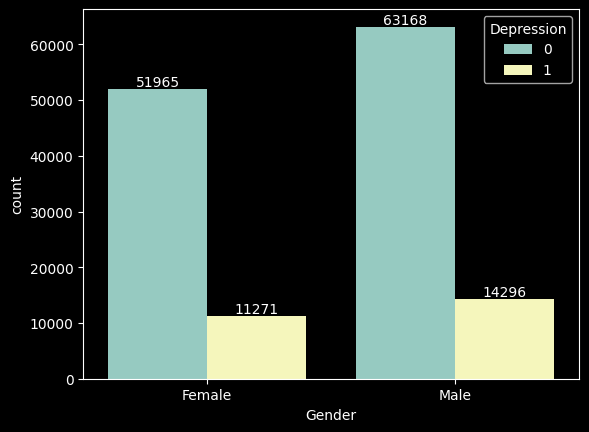

In [ ]:
ax = sns.countplot(data=processed_data, x='Gender', hue='Depression')
annot_plot(ax)

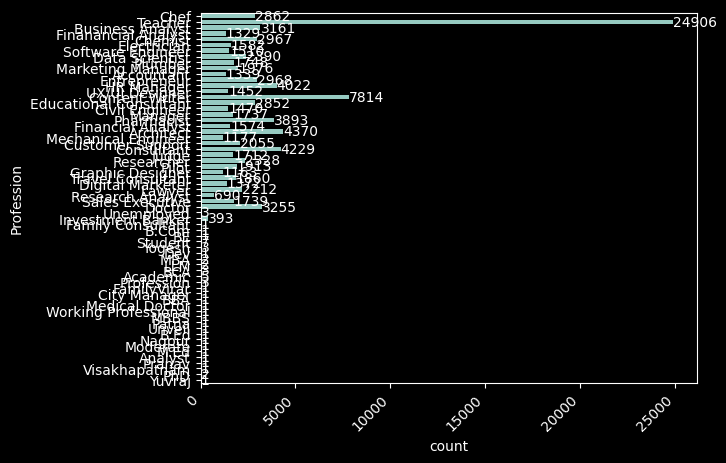

In [ ]:
# ax = sns.countplot(processed_data.loc[processed_data["Profession"].isin(processed_data['Profession'].value_counts().iloc[:10].index.tolist()), [TARGET, 'Profession' ]], x='Profession')
ax = sns.countplot(processed_data.loc[:,"Profession"])
plt.xticks(rotation=45, ha='right')
annot_plot(ax)

In [ ]:
processed_data.isnull().sum()

Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               36630
Work Pressure                            27918
Job Satisfaction                         27910
Sleep Duration                              15
Dietary Habits                               0
Degree                                       0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
Depression                                   0
dtype: int64